In [2]:
import os
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import datetime
import cv2

import os
import numpy as np
from pdb import set_trace

import colorsys
import random
from os.path import join

def plot_predicted(pred, real, label, ax):

    colors = plt.cm.hsv(np.linspace(0, 1, 2)).tolist()
    colors = ['b','g','r']
    # plots the mean and 1 sigma interval of given mean and std array.
    # path is where to store and name is unique indicate of figure
    n = len(pred)
    for i in range(pred.shape[1]):
        ax.plot(pred[:, i], linestyle='--', color=colors[i])
        ax.plot(real[:, i],color=colors[i], label=labels[i])

    ax.legend(loc='center left')
    ax.set_xlabel('Time step')
    ax.set_ylabel('Angle')
    ax.grid(True)



# Duck 1D Rotation

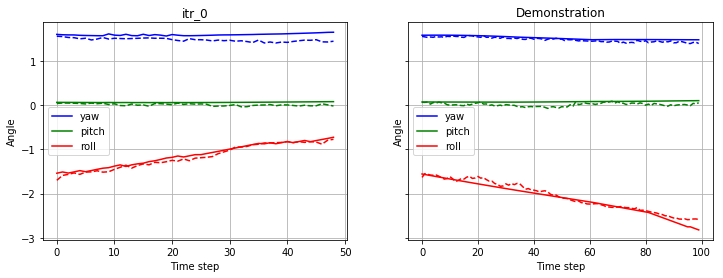

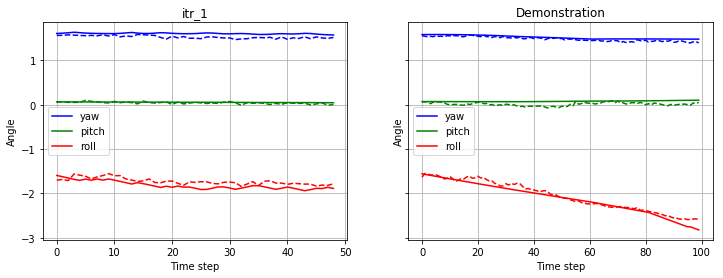

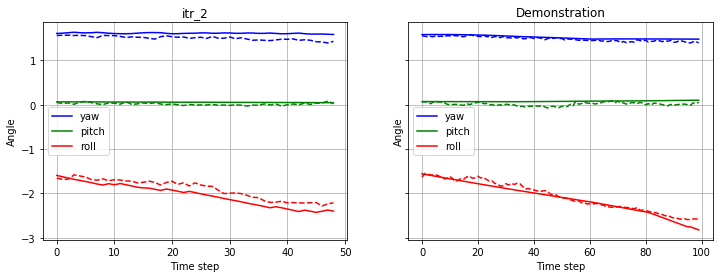

In [50]:
exp_name = 'duck_rotate_1d'
import imageio
DEMO_DIR = '/home/msieb/projects/gps-lfd/demo_data'
# DEMO_NAME = 'demo_only_rotate_4'
DEMO_NAME = 'duck_single_demo'
SEQNAME = '0' # FOR PILQR


run = 'multiple_training_data'
# run = 'best'

logdir=join('/home/msieb/projects/gps-lfd/experiments', exp_name, 'data_files', run)
vid_logdir = join('/home/msieb/projects/gps-lfd/experiments', exp_name, 'data_files', run,'vids')
pred_demo = np.load(join(logdir, 'demo_pose_predicted.npy'))
real_demo = np.load(join(logdir, 'demo_pose_real.npy'))
# labels = ['yaw', 'pitch', 'roll']
# plot_predicted(pred, real, labels)
# plt.legend(loc='best')
# plt.title("demonstration")

####################################3

rollout = '000'
pf, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
pred = np.load(join(vid_logdir, 'pose_predicted_'+ rollout + '.npy'))
real = np.load(join(vid_logdir, 'pose_real_'+ rollout + '.npy'))
plt.title('itr 0')
labels = ['yaw', 'pitch', 'roll']
plot_predicted(pred, real, labels, ax1)
plot_predicted(pred_demo, real_demo, labels, ax2)
ax1.set_title('itr_{}'.format(int(np.floor(int(rollout) / 20))))
ax2.set_title('Demonstration')


     


rollout = '028'
pf, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
pred = np.load(join(vid_logdir, 'pose_predicted_'+ rollout + '.npy'))
real = np.load(join(vid_logdir, 'pose_real_'+ rollout + '.npy'))
plt.title('itr 0')
labels = ['yaw', 'pitch', 'roll']
plot_predicted(pred, real, labels, ax1)
plot_predicted(pred_demo, real_demo, labels, ax2)
ax1.set_title('itr_{}'.format(int(np.floor(int(rollout) / 20))))
ax2.set_title('Demonstration')


    
# rollout = '056'
# pf, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
# pred = np.load(join(vid_logdir, 'pose_predicted_'+ rollout + '.npy'))
# real = np.load(join(vid_logdir, 'pose_real_'+ rollout + '.npy'))
# plt.title('itr 0')
# labels = ['yaw', 'pitch', 'roll']
# plot_predicted(pred, real, labels, ax1)
# plot_predicted(pred_demo, real_demo, labels, ax2)
# ax1.set_title('itr_{}'.format(int(np.floor(int(rollout) / 20))))
# ax2.set_title('Demonstration')



    
# rollout = '096'
# pf, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
# pred = np.load(join(vid_logdir, 'pose_predicted_'+ rollout + '.npy'))
# real = np.load(join(vid_logdir, 'pose_real_'+ rollout + '.npy'))
# plt.title('itr 0')
# labels = ['yaw', 'pitch', 'roll']
# plot_predicted(pred, real, labels, ax1)
# plot_predicted(pred_demo, real_demo, labels, ax2)
# ax1.set_title('itr_{}'.format(int(np.floor(int(rollout) / 20))))
# ax2.set_title('Demonstration')


rollout = '040'
pf, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
pred = np.load(join(vid_logdir, 'pose_predicted_'+ rollout + '.npy'))
real = np.load(join(vid_logdir, 'pose_real_'+ rollout + '.npy'))
labels = ['yaw', 'pitch', 'roll']
plot_predicted(pred, real, labels, ax1)
plot_predicted(pred_demo, real_demo, labels, ax2)
ax1.set_title('itr_{}'.format(int(np.floor(int(rollout) / 20))))
ax2.set_title('Demonstration')

    

plt.show()       


<built-in function len>
<built-in function len>
<built-in function len>


Text(0.5,1,'Learned policy - iteration 2')

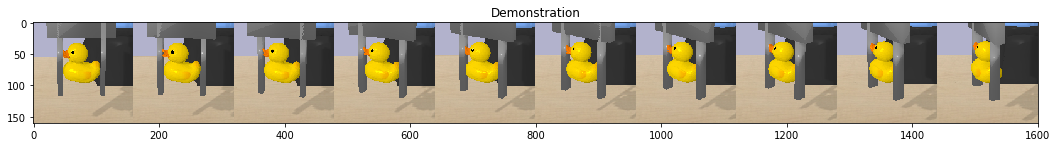

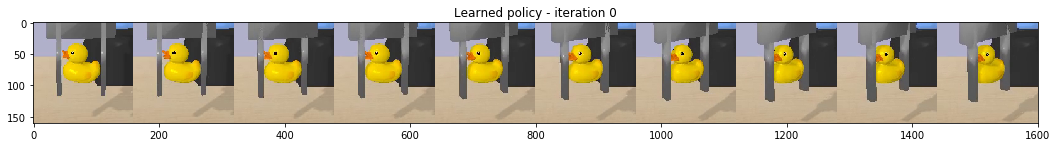

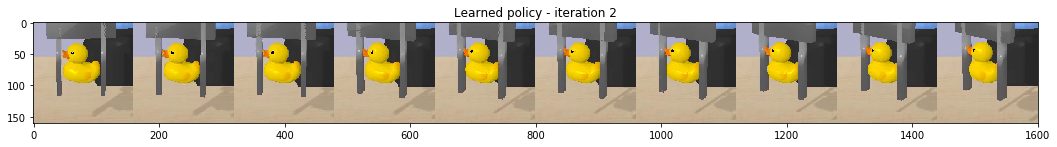

In [57]:
# Plot Demo
T = 10 # Plot that many images
plt.figure(figsize=(18,16))
DEMO_PATH = join(DEMO_DIR, DEMO_NAME)
img_path = join(DEMO_PATH, 'rgb')
filenames = [file for file in os.listdir(img_path) if '.png' in file and SEQNAME == file.split('_')[0]]
filenames = sorted(filenames, key=lambda x: x.split('.')[0])
imgs = []
plot_imgs = []
for ii, file in enumerate(filenames):
    img = plt.imread(join(img_path, file))
    if img.shape[-1] == 4:
        img = img[:, :, :-1]
    imgs.append(img)

# Load embedding target into cost target
print(len)
for tt in range(T):
    step_size = int(np.floor(1.0*len(imgs) / T))

    if tt == 0 :
        plot_imgs = imgs[tt]
    else:
        plot_imgs = np.hstack([plot_imgs, imgs[tt*step_size]])
plt.imshow(plot_imgs)
plt.title('Demonstration')

# Plot video
# filename = 'rgb_sample_196.mp4'
# reader = imageio.get_reader(join('/home/msieb/projects/gps-lfd/experiments/duck_rotate_3/data_files/best/vids', filename))
# imgs = []
# plot_imgs = []
# for img in reader:
#     if img.shape[-1] == 4:
#         img = img[:, :, :-1]
#     imgs.append(img)
# plt.title('Demonstration')
# # Load embedding target into cost target
# print(len)
# for tt in range(T):
#     step_size = int(np.floor(1.0*len(imgs) / T))

#     if tt == 0 :
#         plot_imgs = imgs[tt]
#     else:
#         plot_imgs = np.hstack([plot_imgs, imgs[tt*step_size]])
# plt.imshow(plot_imgs)


plt.figure(figsize=(18,16))
rollout = 0
filename = 'rgb_sample_{0:03d}.mp4'.format(rollout)
reader = imageio.get_reader(join(vid_logdir, filename))
imgs = []
plot_imgs = []
for img in reader:
    if img.shape[-1] == 4:
        img = img[:, :, :-1]
    imgs.append(img)

# Load embedding target into cost target
print(len)
for tt in range(T):
    step_size = int(np.floor(1.0*len(imgs) / T))

    if tt == 0 :
        plot_imgs = imgs[tt]
    else:
        plot_imgs = np.hstack([plot_imgs, imgs[tt*step_size]])
plt.imshow(plot_imgs)
plt.title('Learned policy - iteration {}'.format(int(np.floor(int(rollout) / 20))))

plt.figure(figsize=(18,16))
rollout = 44
filename = 'rgb_sample_{0:03d}.mp4'.format(rollout)
reader = imageio.get_reader(join(vid_logdir, filename))
imgs = []
plot_imgs = []
for img in reader:
    if img.shape[-1] == 4:
        img = img[:, :, :-1]
    imgs.append(img)

# Load embedding target into cost target
print(len)
for tt in range(T):
    step_size = int(np.floor(1.0*len(imgs) / T))

    if tt == 0 :
        plot_imgs = imgs[tt]
    else:
        plot_imgs = np.hstack([plot_imgs, imgs[tt*step_size]])
plt.imshow(plot_imgs)
plt.title('Learned policy - iteration {}'.format(int(np.floor(int(rollout) / 20))))


# Duck 3D Rotation

exp_name = 'duck_rotate_3d'
import imageio
DEMO_DIR = '/home/msieb/projects/gps-lfd/demo_data'
# DEMO_NAME = 'demo_only_rotate_4'
DEMO_NAME = 'duck_rot_3d'
SEQNAME = '0' # FOR PILQR


run = '2018-10-29_13-23-58'

logdir = join('/home/msieb/projects/gps-lfd/experiments', exp_name, 'data_files', run)
vid_logdir = join('/home/msieb/projects/gps-lfd/experiments', exp_name, 'data_files', run,'vids')
pred_demo = np.load(join(logdir, 'demo_pose_predicted.npy'))
real_demo = np.load(join(logdir, 'demo_pose_real.npy'))
# labels = ['yaw', 'pitch', 'roll']
# plot_predicted(pred, real, labels)
# plt.legend(loc='best')
# plt.title("demonstration")

####################################3

rollout = 0
pf, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
pred = np.load(join(vid_logdir, 'pose_predicted_{0:03d}'.format(rollout) + '.npy'))
real = np.load(join(vid_logdir, 'pose_real_{0:03d}'.format(rollout) + '.npy'))
plt.title('itr 0')
labels = ['yaw', 'pitch', 'roll']
plot_predicted(pred, real, labels, ax1)
plot_predicted(pred_demo, real_demo, labels, ax2)
ax1.set_title('itr_{}'.format(int(np.floor(int(rollout) / 20))))
ax2.set_title('Demonstration')


     


# rollout = 28
# pf, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
# pred = np.load(join(vid_logdir, 'pose_predicted_{0:03d}'.format(rollout) + '.npy'))
# real = np.load(join(vid_logdir, 'pose_real_{0:03d}'.format(rollout) + '.npy'))
# plt.title('itr 0')
# labels = ['yaw', 'pitch', 'roll']
# plot_predicted(pred, real, labels, ax1)
# plot_predicted(pred_demo, real_demo, labels, ax2)
# ax1.set_title('itr_{}'.format(int(np.floor(int(rollout) / 20))))
# ax2.set_title('Demonstration')


    
# rollout = '056'
# pf, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
# pred = np.load(join(vid_logdir, 'pose_predicted_{0:03d}'.format(rollout) + '.npy'))
# real = np.load(join(vid_logdir, 'pose_real_{0:03d}'.format(rollout) + '.npy'))
# plt.title('itr 0')
# labels = ['yaw', 'pitch', 'roll']
# plot_predicted(pred, real, labels, ax1)
# plot_predicted(pred_demo, real_demo, labels, ax2)
# ax1.set_title('itr_{}'.format(int(np.floor(int(rollout) / 20))))
# ax2.set_title('Demonstration')



    
rollout = 32
pf, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
pred = np.load(join(vid_logdir, 'pose_predicted_{0:03d}'.format(rollout) + '.npy'))
real = np.load(join(vid_logdir, 'pose_real_{0:03d}'.format(rollout) + '.npy'))
plt.title('itr 0')
labels = ['yaw', 'pitch', 'roll']
plot_predicted(pred, real, labels, ax1)
plot_predicted(pred_demo, real_demo, labels, ax2)
ax1.set_title('itr_{}'.format(int(np.floor(int(rollout) / 20))))
ax2.set_title('Demonstration')


rollout = 500
pf, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
pred = np.load(join(vid_logdir, 'pose_predicted_{0:03d}'.format(rollout) + '.npy'))
real = np.load(join(vid_logdir, 'pose_real_{0:03d}'.format(rollout) + '.npy'))
labels = ['yaw', 'pitch', 'roll']
plot_predicted(pred, real, labels, ax1)
plot_predicted(pred_demo, real_demo, labels, ax2)
ax1.set_title('itr_{}'.format(int(np.floor(int(rollout) / 20))))
ax2.set_title('Demonstration')

    

plt.show()       


<built-in function len>
<built-in function len>
<built-in function len>


Text(0.5,1,'Learned policy - iteration 25')

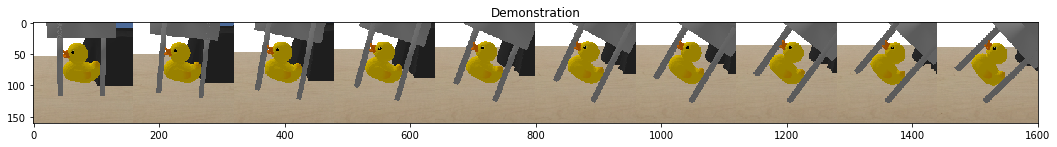

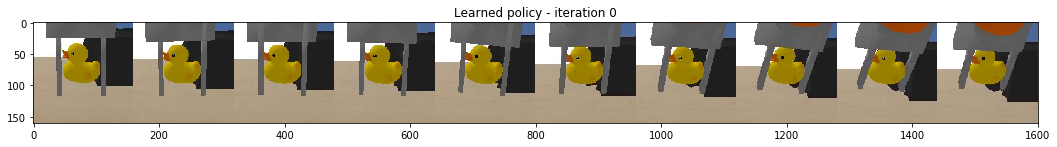

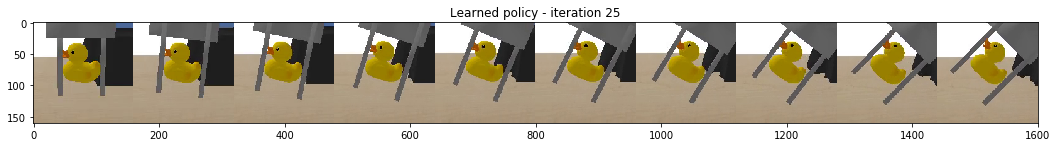

In [114]:
# Plot Demo
T = 10 # Plot that many images
plt.figure(figsize=(18,16))
DEMO_PATH = join(DEMO_DIR, DEMO_NAME)
img_path = join(DEMO_PATH, 'rgb')
filenames = [file for file in os.listdir(img_path) if '.png' in file and SEQNAME == file.split('_')[0]]
filenames = sorted(filenames, key=lambda x: x.split('.')[0])
imgs = []
plot_imgs = []
for ii, file in enumerate(filenames):
    img = plt.imread(join(img_path, file))
    if img.shape[-1] == 4:
        img = img[:, :, :-1]
    imgs.append(img)

# Load embedding target into cost target
print(len)
for tt in range(T):
    step_size = int(np.floor(1.0*len(imgs) / T))

    if tt == 0 :
        plot_imgs = imgs[tt]
    else:
        plot_imgs = np.hstack([plot_imgs, imgs[tt*step_size]])
plt.imshow(plot_imgs)
plt.title('Demonstration')

# Plot video
# filename = 'rgb_sample_196.mp4'
# reader = imageio.get_reader(join('/home/msieb/projects/gps-lfd/experiments/duck_rotate_3/data_files/best/vids', filename))
# imgs = []
# plot_imgs = []
# for img in reader:
#     if img.shape[-1] == 4:
#         img = img[:, :, :-1]
#     imgs.append(img)
# plt.title('Demonstration')
# # Load embedding target into cost target
# print(len)
# for tt in range(T):
#     step_size = int(np.floor(1.0*len(imgs) / T))

#     if tt == 0 :
#         plot_imgs = imgs[tt]
#     else:
#         plot_imgs = np.hstack([plot_imgs, imgs[tt*step_size]])
# plt.imshow(plot_imgs)


plt.figure(figsize=(18,16))
rollout = 0
filename = 'rgb_sample_{0:03d}.mp4'.format(rollout)
reader = imageio.get_reader(join(vid_logdir, filename))
imgs = []
plot_imgs = []
for img in reader:
    if img.shape[-1] == 4:
        img = img[:, :, :-1]
    imgs.append(img)

# Load embedding target into cost target
print(len)
for tt in range(T):
    step_size = int(np.floor(1.0*len(imgs) / T))

    if tt == 0 :
        plot_imgs = imgs[tt]
    else:
        plot_imgs = np.hstack([plot_imgs, imgs[tt*step_size]])
plt.imshow(plot_imgs)
plt.title('Learned policy - iteration {}'.format(int(np.floor(int(rollout) / 20))))

#####

plt.figure(figsize=(18,16))
rollout = 500
filename = 'rgb_sample_{0:03d}.mp4'.format(rollout)
reader = imageio.get_reader(join(vid_logdir, filename))
imgs = []
plot_imgs = []
for img in reader:
    if img.shape[-1] == 4:
        img = img[:, :, :-1]
    imgs.append(img)

# Load embedding target into cost target
print(len)
for tt in range(T):
    step_size = int(np.floor(1.0*len(imgs) / T))

    if tt == 0 :
        plot_imgs = imgs[tt]
    else:
        plot_imgs = np.hstack([plot_imgs, imgs[tt*step_size]])
plt.imshow(plot_imgs)
plt.title('Learned policy - iteration {}'.format(int(np.floor(int(rollout) / 20))))

In [92]:
import pybullet
import pyquaternion
import math

def rotationMatrixToEulerAngles(R) :
    
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])

    singular = sy < 1e-6

    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0
    return np.array([x, y, z])


video_path = join(DEMO_PATH, 'videos')
poses = np.load(join(video_path, '0.npy'))
pose_1 = poses[0][-4:]
euler_1  = pybullet.getEulerFromQuaternion(pose_1)
euler_2 = rotationMatrixToEulerAngles(pyquaternion.Quaternion(pose_1[[3,0,1,2]]).rotation_matrix)

In [95]:
for i in range(len(poses)):
    print(pybullet.getEulerFromQuaternion(poses[i][-4:]))

(1.5850001066170132, 0.0726706978218944, -1.557476374179911)
(1.5801293941827748, 0.08569298586736616, -1.5683388381743382)
(1.574895102172178, 0.09780210634466936, -1.5785895751706318)
(1.569589440039459, 0.10990620137588908, -1.5888475131644944)
(1.5641741660581132, 0.12195126536140218, -1.599073336181497)
(1.5586566858203625, 0.13393333169273502, -1.6092653875051852)
(1.553040882795468, 0.14584683741456422, -1.6194200914731929)
(1.5473309645390745, 0.15768688949576445, -1.6295339684994175)
(1.5415312283471334, 0.1694493286129452, -1.6396034772825727)
(1.5356460831254282, 0.18113080338910115, -1.6496250213814314)
(1.5296800266032753, 0.19272881590658597, -1.659594963453316)
(1.523637598652694, 0.204241742342245, -1.669509644286033)
(1.5175233265779628, 0.21566883378707113, -1.6793654118230732)
(1.5113416606910461, 0.22701019744241546, -1.6891586457236312)
(1.5050969252787532, 0.23826676195546198, -1.6988857905876114)
(1.498793249764121, 0.24944023008227664, -1.7085433876484093)
(1.49